# Week Four Homework

### While AI-assisted tools such as ChatGPT will be used in the completion of this assignment, the use of published documentation online will be used in the assistance of writing code.
The documentation that will be used is as follows:<br>
    - [docs.python.org](https://docs.python.org/3/)<br>
    - [pandas.pydata.org](https://pandas.pydata.org/docs/user_guide/index.html)<br>
    - [plotly.com](https://plotly.com/python-api-reference/generated/plotly.graph_objects.html#plotly.graph_objects.Figure)<br>

The ChatGPT chat log:<br>
   - [Click Here](https://chatgpt.com/share/66ff63ca-9414-800d-b2d4-1e0be05f147a)

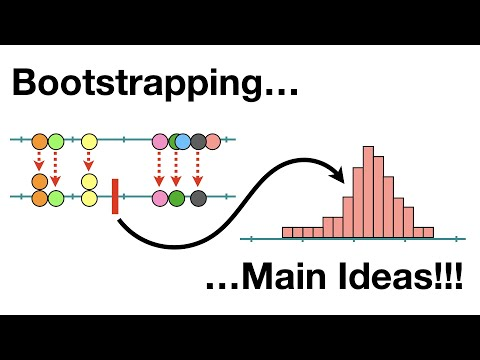

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

<h2>Pre-lecture Homework</h2>

### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

After prompting ChatGPT with the problem, it states that while the standard error of the mean (SEM) and the standard deviation (SD) both measure variability, they measure the variance of different fundamental ideas and values. First, the SD measures the average distance for a **set of points** from the average value for a given dataset. However, the SEM measures the spread of the **average** for a dataset- which is often obtained through multiple trials or bootstrapping. Due to the slight differences in the data for each trial or each round of bootstrapping, the average will change for each subset from this process. With these definitions, we can also think of the SEM as the standard deviation of the **averages** for multiple sets of the data of the same size.



### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

To create a 95% confidence interval, there are are many steps needed to accomplish the task. First, we need the mean of the bootstrapped samples. Then, we use this mean to calculate the standard error of the mean using the formula `SEM = Standard Deviation of bootstrapped means / sqrt(sample size)`. Then, to create a range that is approximately 95%, we set our range to 2 standard errors below and 2 standard errors above the mean value. Now, we can multiply the standard error of the mean by 2 standard errors to add and subtract from the mean, to create our upper and lower bounds. This range defines our 95% confidence interval.

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

First, we should perform bootstrapping and get new samples of the data. With each sample, collect the mean and then sort them from least to greatest. Then, find the points which represent the 2.5 percentile (where the value is larger than 2.5% of all the data) and the 97.5 percentile (where the individual point is larger than 97.5% of all the values). This works because the range in between these represents 95% of all the data, with 2.5% left over at the lower end and 2.5% left over at the higher end. The values at the 2.5 percentile and 97.5 percentile are the lower and upper bounds respectively of your bootstrapped confidence interval.

### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Function to calculate a 95% bootstrap confidence interval
def bootstrap_confidence_interval(data, num_bootstrap_samples=10000, stat_function=np.mean, ci=95):
    """
    data: The dataset (array-like) for which to calculate the confidence interval.
    num_bootstrap_samples: The number of bootstrap samples to draw.
    stat_function: The function used to calculate the population parameter (e.g., mean, median).
    ci: The desired confidence interval percentage (default is 95%).
    """

    # Step 1: Create an empty list to store the bootstrapped statistics
    bootstrap_statistics = []

    # Step 2: Perform bootstrapping
    n = len(data)  # Size of the original dataset
    for _ in range(num_bootstrap_samples):
        # Draw a random sample (with replacement) from the data
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        
        # Calculate the desired statistic (mean, median, etc.) for the bootstrap sample
        stat = stat_function(bootstrap_sample)
        bootstrap_statistics.append(stat)

    # Step 3: Calculate the desired percentiles (e.g., 2.5th and 97.5th for a 95% CI)
    lower_percentile = (100 - ci) / 2  # Lower bound for 95% CI (2.5th percentile)
    upper_percentile = 100 - lower_percentile  # Upper bound for 95% CI (97.5th percentile)

    # Step 4: Calculate the confidence interval from the sorted bootstrapped statistics
    lower_bound = np.percentile(bootstrap_statistics, lower_percentile)
    upper_bound = np.percentile(bootstrap_statistics, upper_percentile)

    return lower_bound, upper_bound

# Example usage for the population mean:
data = np.random.randn(100)  # Simulated data (100 data points from a normal distribution)
ci_lower, ci_upper = bootstrap_confidence_interval(data, stat_function=np.mean)
print(f"95% confidence interval for the mean: ({ci_lower}, {ci_upper})")

# Example usage for the population median:
# To change the confidence interval calculation to the median, simply pass np.median as the stat_function:
ci_lower, ci_upper = bootstrap_confidence_interval(data, stat_function=np.median)
print(f"95% confidence interval for the median: ({ci_lower}, {ci_upper})")

95% confidence interval for the mean: (-0.16102389245924867, 0.22354147677722652)
95% confidence interval for the median: (-0.2838148914845807, 0.38491936428567464)


## Post-lecture Homework

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

A sample statistic is the value we derive from a small sample of data, such as the average height of 100 people we surveyed, whereas a population parameter is the actual value we're seeking to determine (such as the average height of all persons in a nation). The main distinction is that the population parameter is the real number that matters to us, but we often can't find out since measuring everyone is either too difficult or impossible. Rather, we estimate the population parameter using the sample statistic. But since we're just utilizing a sample of the data, we can be certain that the sample statistic is merely an estimate and won't be flawless. Confidence intervals are useful in this situation. Based on the sample statistic, a confidence interval provides us with a range of values that most likely include the real population parameter. It helps us comprehend how uncertain or accurate our estimate is and takes into consideration the fact that our sample is only a small portion of the larger picture. Because the sample statistic is what we really have and the population parameter is what we want to know, it is crucial to distinguish between the two. The confidence interval helps to close this gap.

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. 


1. **What is the process of bootstrapping?**<br>
When we bootstrap a dataset, we aim to reduce the amount of trials that we need to do when gathering information by using one sample set that we already have. To perform bootstrapping, first we collect a data sample. We can imagine the data as a number line, as that can be useful for visualizing this concept. Then, we create a second number line- and this time, to fill the data, we need as many data points for this set as the original data. This means that if our original set of data had 20 points, our new bootstrapped dataset also needs 20 points. For these 20 points, we would randomly pick points from the first data set. However, when we pick that point, we allow it to be re-picked later on as well. To better illustrate this concept, we can imagine a dataset with 20 points in it. Now, for the first point, we have 20 choices to pick from. Then, when we pick the second point, we *still* have 20 different points to pick from, because we can randomly pick the same point that we just picked before. After we create a very large number of these number lines with different points on it, we can do statistics on it and get a large amount of data even though only one real trial was completed at the start.<br><br>

2. **What is the main purpose of bootstrapping?**<br>
The point of bootstrapping is to get an idea of what results we would get if we were to gather multiple samples of data, but we only need to collect one sample of data instead. This can simulate collecting many samples of natural data to find trends that may not have been evident with the single dataset by itself. The reason why a statistician would want to perform bootstrapping is because it can often be often very impractical (or even impossible) to get large sets of data that represents everybody in a population. For example, if you were a coffee shop owner and you wanted to conduct a survey on their satisfaction with their experience and you believe that the average customer enjoyed their time at the store, it would be very expensive and/or very time consuming to ask every single customer about their opinions. However, by asking select random individuals of different demographics and at different times of day, we can use bootstrapping to simulate what it would have been like had you really asked every customer opinions on the matter in a much shorter amount of time. This allows you to see if your original belief that the average customer enjoys the store is likely or not. In short, it allows you to measure your uncertainty for your averages and other statistics for your small dataset.<br><br>

3. **If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**<br>
First, you should start with the sample. Then, using the process discussed in the first question of creating more samples by randomly choosing from the one we already have, we can have a dataset that is much larger than the one we started with. Once we complete the bootstrapping process a large number of times (maybe 1000 or 10000 times) to represent a large number of bootstrapped samples, we can get the averages for these samples. With this process, we can get a range of values based on the real data that we collected that can show us if our guess is possible or sensible. If our guess falls within this range of values, we can say that our guess is very plausible because it lines up with what the data seems to suggest. If it falls outside, we can say that our guess is pretty implausible as it does not agree with the data that we have collected.


### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

A confidence interval overlaps zero when the real impact or difference we are attempting to assess might have a value of zero. Zero falls inside the confidence interval, indicating a possibility of no impact or no difference between groups, supporting the null hypothesis—that nothing noteworthy is occurring. We cannot declare with confidence that the effect is genuine even if the sample mean is not zero because zero is in the interval. However, we have greater evidence that there is a genuine impact or difference if the confidence interval does not contain zero, indicating that zero is unlikely to be the true value. 

### 8. Complete the assignment.
#### Problem Introduction
The stance of a null hypothesis (in this case, no effect) explains a default state of the vaccine not showing any evidence of having any impact on the user. That is to say, the mean health score before taking the vaccine should be approximately the same as the health score after taking the vaccine in this case. 

<Figure size 800x600 with 0 Axes>

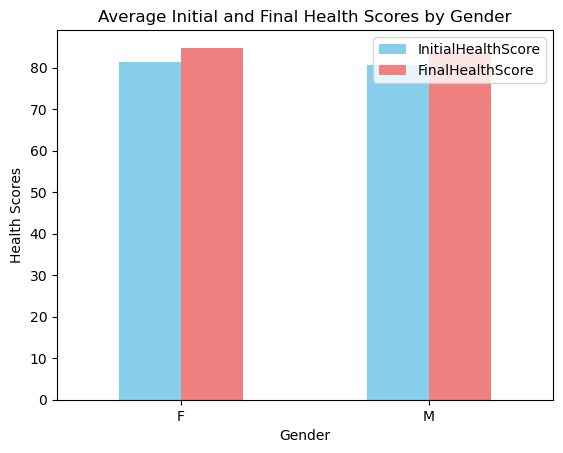

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data.csv')

# Calculate average scores by gender
gender_scores = data.groupby('Gender').mean()[['InitialHealthScore', 'FinalHealthScore']].reset_index()

# Plot
plt.figure(figsize=(8, 6))
gender_scores.plot(x='Gender', kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
plt.title('Average Initial and Final Health Scores by Gender')
plt.ylabel('Health Scores')
plt.xticks(rotation=0)
plt.show()

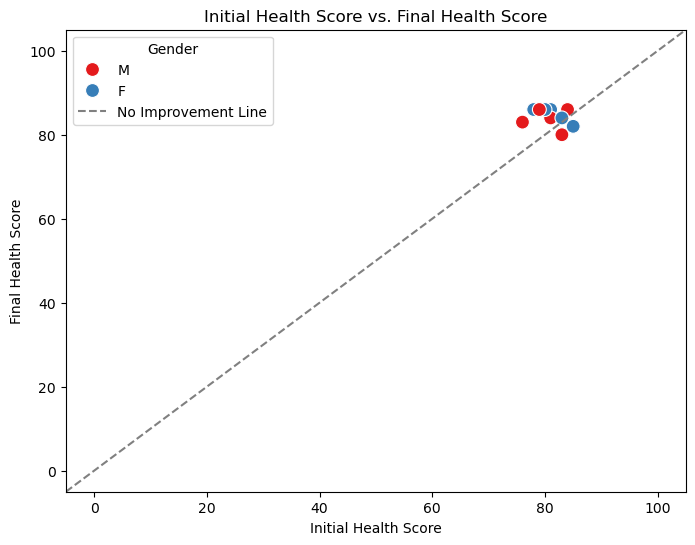

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='InitialHealthScore', y='FinalHealthScore', hue='Gender', data=data, palette='Set1', s=100)
plt.title('Initial Health Score vs. Final Health Score')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.axline([0, 0], [100, 100], color="gray", linestyle="--", label="No Improvement Line")  # Add a no-change line
plt.legend(title='Gender')
plt.show()

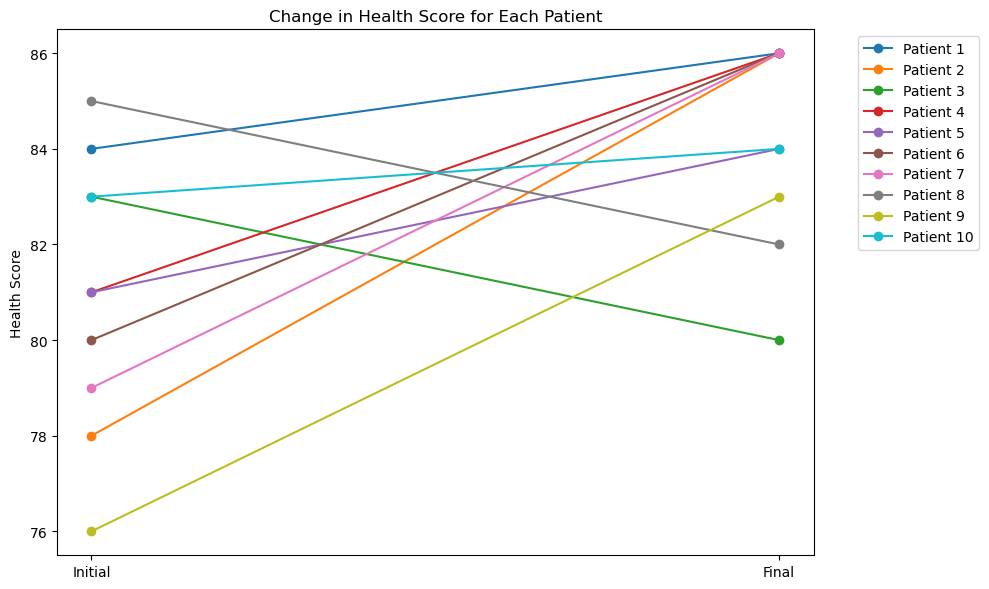

In [11]:
plt.figure(figsize=(10, 6))
for i, row in data.iterrows():
    plt.plot(['Initial', 'Final'], [row['InitialHealthScore'], row['FinalHealthScore']], marker='o', label=f'Patient {row["PatientID"]}')

plt.title('Change in Health Score for Each Patient')
plt.ylabel('Health Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_146/2784127519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='InitialHealthScore', data=data, palette='Set2')
/tmp/ipykernel_146/2784127519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='FinalHealthScore', data=data, palette='Set3')


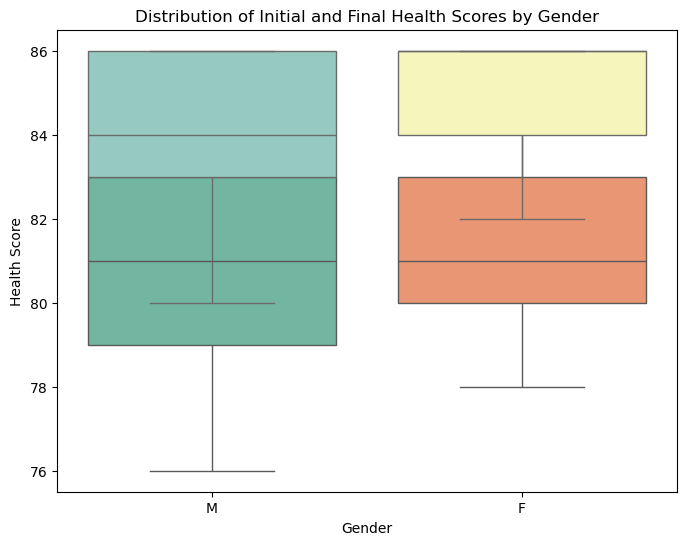

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='InitialHealthScore', data=data, palette='Set2')
sns.boxplot(x='Gender', y='FinalHealthScore', data=data, palette='Set3')
plt.title('Distribution of Initial and Final Health Scores by Gender')
plt.ylabel('Health Score')
plt.show()

The code below shows the process of bootstrapping, where we use the process to estimate and simulate what it would be like to work with a larger dataset and see what trends emerge that can tell us about whether the null hypothesis is valid.

95% Confidence Interval for the mean change in health score: (0.90, 5.50)


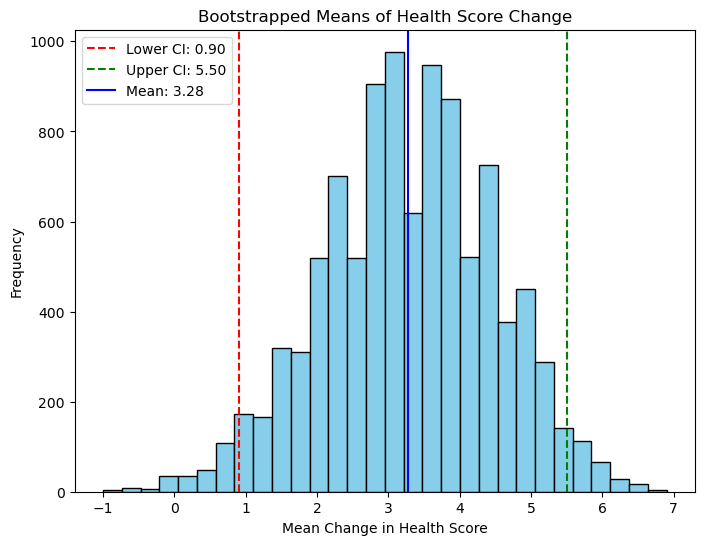

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data.csv')

# Calculate the change in health score (FinalHealthScore - InitialHealthScore)
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Function to perform bootstrapping
def bootstrap(data, num_samples=1000, stat_function=np.mean):
    """
    data: Array-like data to bootstrap.
    num_samples: Number of bootstrap samples to draw.
    stat_function: The function used to calculate the statistic (e.g., np.mean for mean).
    """
    n = len(data)
    bootstrapped_stats = []
    
    # Generate bootstrap samples and compute the statistic for each sample
    for _ in range(num_samples):
        # Randomly sample the data with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        
        # Calculate the statistic and store it
        stat = stat_function(bootstrap_sample)
        bootstrapped_stats.append(stat)
    
    return np.array(bootstrapped_stats)

# Apply bootstrapping to the HealthScoreChange column
num_bootstrap_samples = 10000
bootstrap_means = bootstrap(data['HealthScoreChange'], num_samples=num_bootstrap_samples)

# Calculate 95% confidence interval from the bootstrapped means
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Print results
print(f"95% Confidence Interval for the mean change in health score: ({ci_lower:.2f}, {ci_upper:.2f})")

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='black', color='skyblue')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower CI: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'Upper CI: {ci_upper:.2f}')
plt.axvline(np.mean(bootstrap_means), color='blue', linestyle='-', label=f'Mean: {np.mean(bootstrap_means):.2f}')
plt.title('Bootstrapped Means of Health Score Change')
plt.xlabel('Mean Change in Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The graph above shows that for a 95% confidence interval, the null hypothesis (in this case, a mean change in health of 0) falls outside the range for our confidence interval. This means that while a null hypothesis isn't impossible, it is highly implausible and this data tells us that it is highly likely that the vaccine has a positive effect on the patients and it contributes to positive health. Thus, we can conclude that it is highly likely that the vaccine has a positive effect on the patients.

**Further considerations:**<br>
This small sample size leaves a lot of data out that is to be desired. First of all, the age range of the patients are all pretty close to one another, with a minimum of 29 and a maximum of 52. This means that most of these patients are in their adult years, and thus we have no idea whether the vaccine has any adverse side effects or any effects at all on children and the elderly. Furthermore, we also cannot conclude whether the results that we are seeing are due to the vaccine, or if it is the natural processes of the human body which is recovering. There is no placebo or control data to compare to, so this data by itself can seem pretty meaningless since we do not know if their recovery is truly due to the vaccine or for other reasons that is not made known in the dataset. We also do not know more about the demographics of the patients beyond their age and gender. Perhaps, this vaccine has a higher efficacy rate for different races and these patients are of the same race. Therefore, the data leaves much to be desired and thus, while the data itself suggets efficacy, the lack of external evaluation of the data presented can lead us to realize that without context, this data is meaningless and the results should be treated with high skepticism. Thus, it is wise to conclude that this data is inconclusive, simply due to the lack of context, lack of a control to compare against, lack of advanced demographic research on the patients, lack of representation of an entire population, and probably a lot of other factors leading to the poor taste left in the mouth by this research.

### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

**Probably.**